Um problema comum quando trabalhando com séries temporais é de se encontrar horas/dias/meses inexistentes no conjunto de dados que estamos trabalhando. 

Como procuramos manter sempre uma consistência neste conjunto, para visualizarmos os dados corretamente e aplicarmos técnicas estatísticas adequadamente, iremos ver neste breve tutorial como reindexar um dataframe, inserindo automaticamente as datas faltantes no conjunto com o valor ```NaN``` associado.

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [5]:
# leitura
df = pd.read_csv('../dados/mare_exemplo.csv', index_col=0)
df.index = pd.to_datetime(df.index)

df.head()

,Nível do Mar
1993-01-01 01:00:00,2.03
1993-01-01 02:00:00,2.24
1993-01-01 03:00:00,2.39
1993-01-01 04:00:00,2.15
1993-01-01 05:00:00,1.92


Vamos selecionar apena Fevereiro de 1994 (```df['1994-02']```), que contém um período sem dados. Iremos então copiar este trecho do dataframe (```(.copy=True)```) e remover os valores inválidos no eixo 0 (```.dropna(axis=0)```).

In [6]:
df_ = df['1994-02'].copy(deep=True).dropna(axis=0)

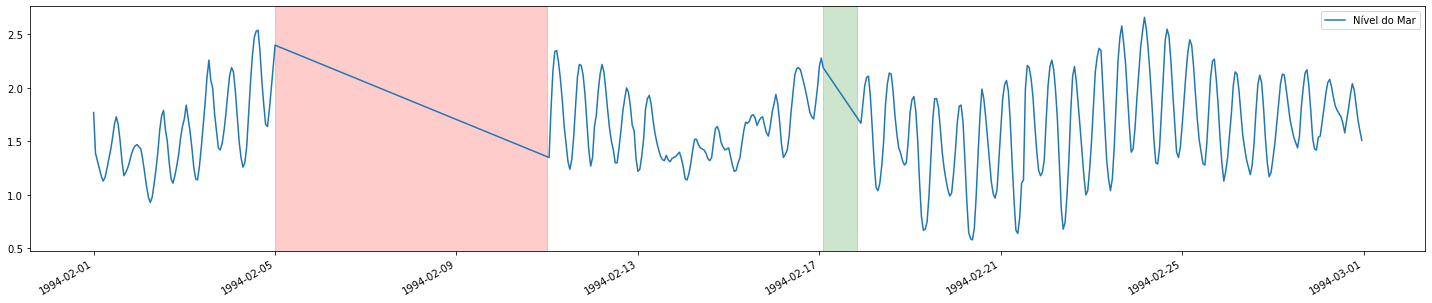

In [7]:
ax = df_.plot(figsize=(25,5))

ax.axvspan('1994-02-05', '1994-02-11', alpha=0.2, color='red')
ax.axvspan('1994-02-17 02', '1994-02-17 20', alpha=0.2, color='green')

Para identificarmos que existem datas faltantes, podemos plotar o eixo temporal. Observem que na figura abaixo existem saltos entre uma data e outra. Estes saltos significam um gap.

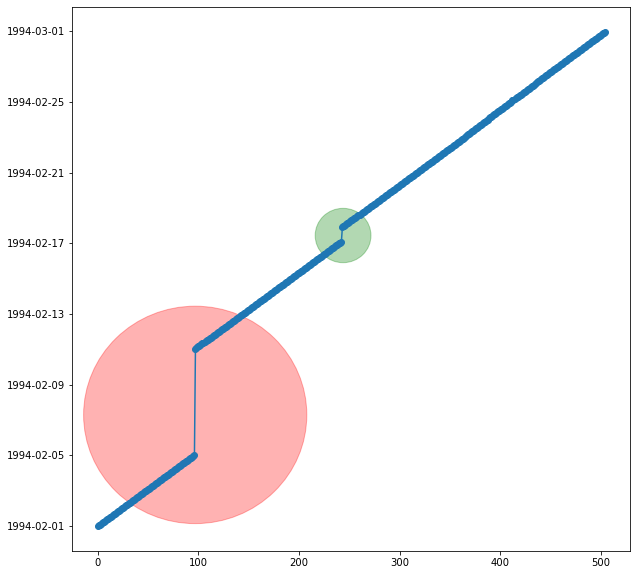

In [8]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(df_.index, '-o')

# adicionando circulos no gráfico
circle1 = plt.Circle((0.22, 0.25), 0.2, color='r', alpha=.3, transform=ax.transAxes)
circle2 = plt.Circle((0.485, 0.58), 0.05, color='g', alpha=.3, transform=ax.transAxes)
ax.add_patch(circle1)
ax.add_patch(circle2)

In [9]:
df_.index.values[0], df_.index.values[-1]

(numpy.datetime64('1994-02-01T00:00:00.000000000'),
 numpy.datetime64('1994-02-28T23:00:00.000000000'))

In [10]:
novo_datetimeindex_completo = pd.date_range(start='1994-02-01 01:00', end='1994-02-28 23:00', freq='1H')

novo_datetimeindex_completo

DatetimeIndex(['1994-02-01 01:00:00', '1994-02-01 02:00:00',
               '1994-02-01 03:00:00', '1994-02-01 04:00:00',
               '1994-02-01 05:00:00', '1994-02-01 06:00:00',
               '1994-02-01 07:00:00', '1994-02-01 08:00:00',
               '1994-02-01 09:00:00', '1994-02-01 10:00:00',
               ...
               '1994-02-28 14:00:00', '1994-02-28 15:00:00',
               '1994-02-28 16:00:00', '1994-02-28 17:00:00',
               '1994-02-28 18:00:00', '1994-02-28 19:00:00',
               '1994-02-28 20:00:00', '1994-02-28 21:00:00',
               '1994-02-28 22:00:00', '1994-02-28 23:00:00'],
              dtype='datetime64[ns]', length=671, freq='H')

Criamos, então, um novo eixo temporal que deverá ter todos os instantes de tempo compreendidos entre 1993-01-01 01:00 até 1995-01-01 00:00.

Para testarmos se o que está sendo feito é de fato válido, podemos comparar o novo eixo de tempo com o eixo de tempo do pandas.DataFrame original (df) que, em teoria, está completo. Vejam:

In [11]:
novo_datetimeindex_completo.shape, df_.shape

((671,), (505, 1))

O eixo 0 dos dois **não** são iguais, mas isso já era esperado uma vez que ```df_``` contém horas sem dados nenhum. Porém, podemos ter certeza que resolvemos nosso problema replotando a série de datas:

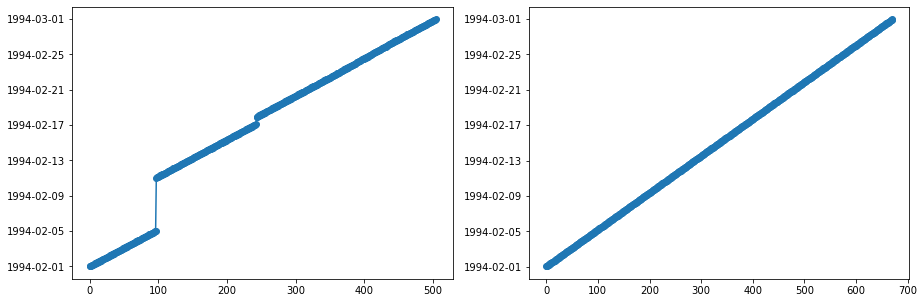

In [12]:
fig,axes = plt.subplots(ncols=2, figsize=(15,5))
axes[0].plot(df_.index, '-o')
axes[1].plot(novo_datetimeindex_completo, '-o')

Iremos agora focar em adaptar o dataframe com datas faltantes para preenchê-las. Para isso iremos usar o método ```.reindex()``` do pandas. Este método recebe como argumento basicamente o novo eixo temporal:

In [13]:
df_full = df_.reindex(novo_datetimeindex_completo)

In [14]:
df_full.shape

(671, 1)

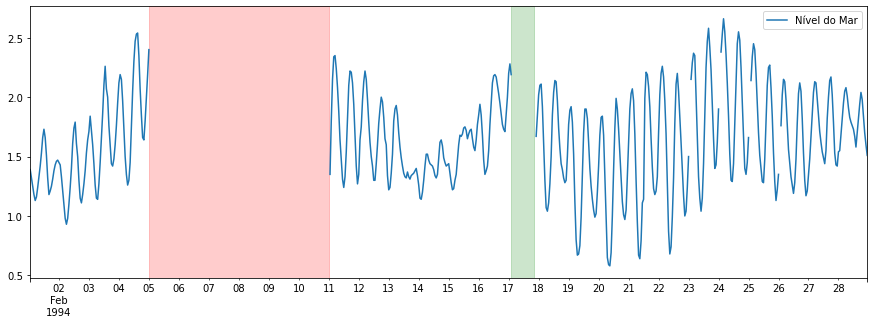

In [15]:
ax = df_full.plot(figsize=(15,5))

ax.axvspan('1994-02-05', '1994-02-11', alpha=0.2, color='red')
ax.axvspan('1994-02-17 02', '1994-02-17 20', alpha=0.2, color='green')